# Non Linear Regression using Scikit-Learn

## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Now, lets look at a number of graphs to understand their shape:

1. Linear

2. Cubic

3. Quadratic

4. Exponential

5. Logarithmic

6. Sigmoidal/Logistic

### Linear

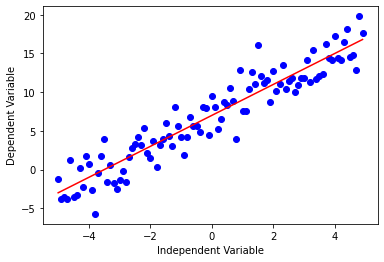

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

#you can adjust the slope and intercept to verify the changes in the graph
y =2*(x)+7
y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise
#plt.figure(figsize=*8,6)
plt.plot(x, ydata,'bo')
plt.plot(x,y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

### Cubic

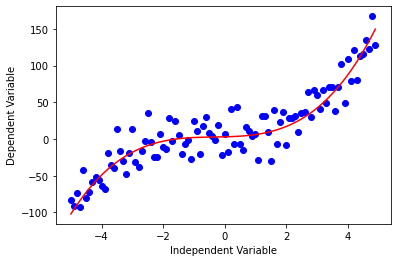

In [5]:
x =np.arange(-5.0,5.0,0.1)

###You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) +1*(x**2) +1*x +3

y_noise= 20*np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

### Quadratic

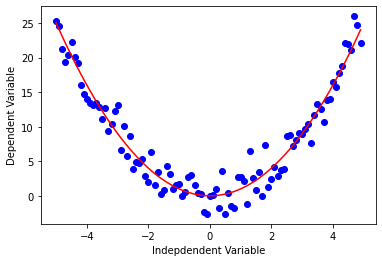

In [11]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

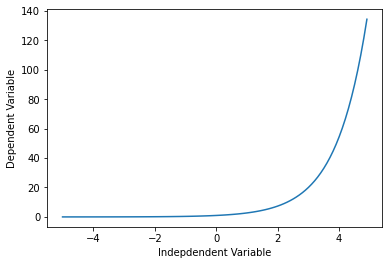

In [12]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

C:\Users\User\AppData\Local\Temp\ipykernel_436\945852816.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


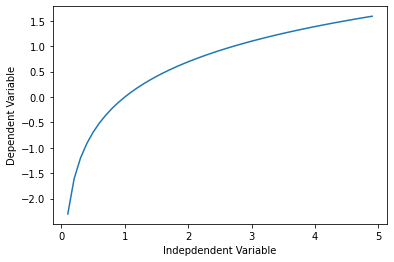

In [13]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic

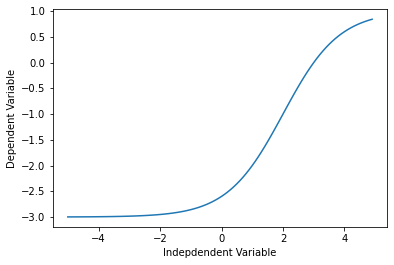

In [14]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non-Linear Regression example

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [16]:
import numpy as np
import pandas as pd

#downloading the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\China GDP Estimation\china_gdp.csv")
df.head()
    

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the dataset

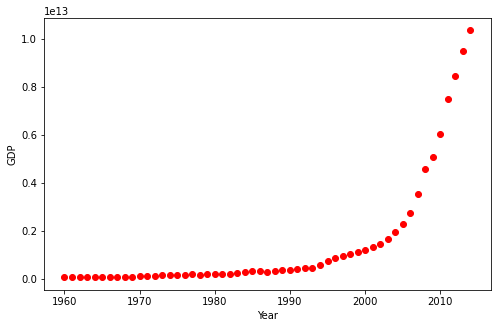

In [19]:
plt.figure(figsize=(8,5))
x_data,y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Choosing a model to fit this data with: Sigmoidal

In [32]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Let's try and fit the data with a random sigmoidal function.

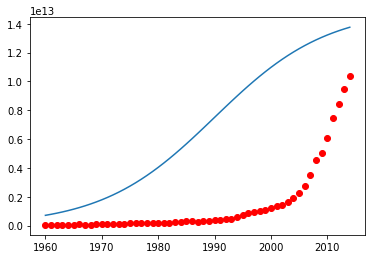

In [33]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [34]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [35]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


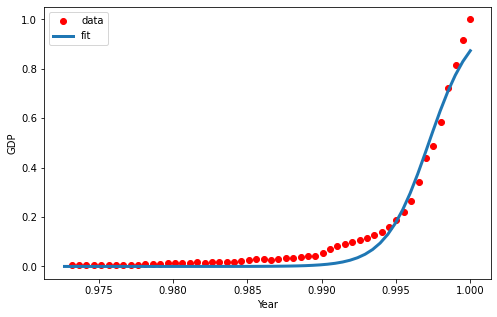

In [36]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Evaluating the Machine Learning Model

In [37]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96
